In [1]:
# file kfkd.py
%matplotlib inline

import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle


FTRAIN = '/home/ec2-user/W207FinalProject/Project/Data/training.csv'
FTEST = '/home/ec2-user/W207FinalProject/Project/Data/test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    #df = read_csv(os.path.expanduser(fname))  # load pandas dataframe
    df = read_csv(fname)  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [2]:
# add to kfkd.py
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden1', layers.DenseLayer),
        #('hidden2', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden1_num_units=50,  # number of units in hidden layer
    #hidden2_num_unites=25,
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)

Using gpu device 0: GRID K520 (CNMeM is disabled, CuDNN not available)
/usr/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f525e91a690>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f525e91a550>,
     check_input=True, custom_scores=None, hidden1_num_units=50,
     input_shape=(None, 9216),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden1', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=400, more_params={},
     objective=<function objective at 0x7f525e91d2a8>,
     objective_loss_function=<function squared_error at 0x7f525f443578>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f525e9224d0>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7f525e922518>],
     output_nonlinearity=None, output_num_units=30, regression=True,
     train_split=<nolearn.lasa

ImageId    1783
Image      1783
dtype: int64


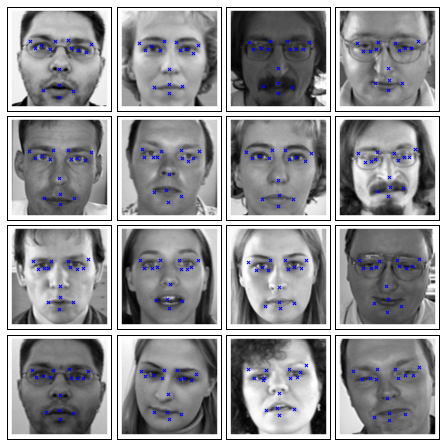

In [3]:
import pylab as pyplot

%matplotlib inline

def mse_calc(valid_loss, verbose = True):
    current_leader = 1.53178
    mse = np.sqrt(valid_loss) * 48
    if verbose == True:
        print 'Current Leader: ',current_leader,'\nYou: ',mse
        if mse>current_leader:
            print 'Do or do not.  There is no try'
        else:
            print 'The force is strong with this one.'
                
    return mse
    
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = net1.predict(X)

fig = pyplot.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X[i+10], y_pred[i+10], ax)

pyplot.show()

In [4]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y


In [19]:
#############################################################################
## Image augmentation
## All functions take a standard data frame as input
#############################################################################

from nolearn.lasagne import BatchIterator
from skimage import data, img_as_float
from skimage import exposure
from skimage.filters import gaussian_filter as gaussian
from skimage.transform import rotate
from scipy.ndimage.interpolation import shift

class WonkyBatchIterator(BatchIterator):

    # Flip left-right ###########################################
    # -- Stolen from Dan Nouri's web page
    def flip_lr(self, Xb, yb, show=False):
        
        flip_indices = [
            (0, 2), (1, 3),
            (4, 8), (5, 9), (6, 10), (7, 11),
            (12, 16), (13, 17), (14, 18), (15, 19),
            (22, 24), (23, 25),
            ]

        image=Xb.reshape(96,96)[:,::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb_flipped = yb.copy()
            yb_flipped[::2] *= -1.0
    
            # Swap places, e.g. left_eye_center_x -> right_eye_center_x
            for a, b in flip_indices:
                yb_flipped[a], yb_flipped[b] = (yb_flipped[b], yb_flipped[a])
                
        if show:
            plt.subplot(1,2,1)
            plot_sample(Xb, yb, plt.gca())
            plt.title('Original')
            
            plt.subplot(1,2,2)
            plot_sample(image, yb_flipped, plt.gca())
            plt.title('LR-Flipped')

            plt.show()
        return image, yb_flipped
        

    

    # linear slide ###########################################
    def shift_augment(self, Xb, yb, amount='random', show=False):
        
        if amount == 'random':
            amount = np.random.randn(2)*2
            
        image = shift(Xb.reshape(96,96), amount, mode='constant')
        yb_shifted = (yb*48.0+48).reshape(15,2)
        yb_shifted[:,0] = yb_shifted[:,0]+amount[1]
        yb_shifted[:,1] = yb_shifted[:,1]+amount[0] #images & coords have opposite axis conventios
        yb_shifted = (yb_shifted.reshape(30,1)-48)/48.0

        if show:
            plt.subplot(1,2,1)
            plot_sample(Xb, yb, plt.gca())
            plt.title('Original')
            
            plt.subplot(1,2,2)
            plot_sample(image, yb_shifted, plt.gca())
            plt.title('Random Shift (X&Y)')

            plt.show()
        
        return image, yb_shifted
    
    # Rotate +/- ? degrees (around image center)#############
    def rotate_augment(self, Xb, yb, degrees='random', show=False):

        if degrees == 'random':
            degrees = np.random.randn()*2  #normal with sigma=2 degrees
        
        image = Xb.reshape(96,96)
        rotated = rotate(image, degrees, resize=False, mode='constant',preserve_range=True)

        radians = degrees * np.pi / 180
        rotation_matrix = np.array([np.cos(radians), -np.sin(radians), np.sin(radians),  np.cos(radians)])
        rotation_matrix = rotation_matrix.reshape(2,2)

        # Raw points are already centered facepoints around the origin
        # rotate
        rotated_points = np.dot(yb.reshape(15,2),rotation_matrix)

        # return rotated point in raw scale (let the plot_scatter func. rescale them)
        
        if show:
            plt.subplot(1,2,1)
            plot_sample(image, yb,plt.gca())
            plt.title('Original')
            
            plt.subplot(1,2,2)
            plot_sample(rotated,rotate_face_points(yb, degrees),plt.gca())
            plt.title('Random Rotation')
            plt.show()

        return rotated, rotated_points.reshape(30,1)


    # Blur ######################################################
    def blur_augment(self, Xb, yb, sigma = 'random', show=False):
        
        if sigma == 'random':
            sigma = np.random.rand(2)*5
        
        image = Xb.reshape(96,96)
        blury = gaussian(image,sigma)

        if show:
            plt.subplot(1,2,1)
            plt.imshow(image,cmap='gray')
            plt.title('Original')
            
            plt.subplot(1,2,2)
            plt.imshow(blury,cmap='gray')
            plt.title('Random 2-D Gaussian Blur')
            plt.show()

        return blury, yb


    # Make them have crappy contrast ##############################
    def contrast_augment(self, Xb, yb, show=False):

        import pylab as plt

        # get rid of pesky 0-value pixels that hose up the log
        orig_shape = Xb.shape
        
        image = Xb.flatten()
        image = np.array([pixel + 0.0001 if pixel < 1 else pixel for pixel in image])
        # Adjust contrast & rescale to [0,1]
        bright = (np.log(image)+max(abs(np.log(image))))/max(abs(np.log(image)))
        bright = bright.reshape(orig_shape)
        
        dim = np.exp(image)/np.max(np.exp(image))
        dim = dim.reshape(orig_shape)

        if show:
            plt.subplot(1,3,1)
            plt.imshow(image.reshape(96,96),cmap='gray')
            plt.title('Original')

            plt.subplot(1,3,2)
            plt.imshow(bright.reshape(96,96),cmap='gray')
            plt.title('Bright')
            
            plt.subplot(1,3,3)
            plt.imshow(dim.reshape(96,96),cmap='gray')
            plt.title('Dim')
            
            plt.show()

        
        if np.random.choice([0,1]): 
            #print 'Dim'
            return dim, yb
        else:
            #print 'Bright'
            return bright, yb



    def transform(self, Xbatch, ybatch):
        # assume an incoming Batch of n images
        # Apply a randomly selected augmentation with a P = 0.5
        
        Xbatch, ybatch = super(WonkyBatchIterator, self).transform(Xbatch, ybatch)
        
        num_records = Xbatch.shape[0]
        
        for rec in range(num_records):
            coinflip = np.random.choice([0,1])

            if coinflip == 0:
                try:
                    # Choose one of the augmentations at random
                    func_list = [self.contrast_augment, 
                                 self.blur_augment, 
                                 self.rotate_augment, 
                                 self.shift_augment, 
                                 self.flip_lr]
                    
                    func_list = [self.flip_lr, self.shift_augment]
                    # Flatten image to use augmentations
                    thisX = Xbatch[rec].flatten()
                    thisY = ybatch[rec]
                    # Choose a function from the list at random and apply the normal call syntax to it

                    Xb,yb = np.random.choice(func_list)(thisX, thisY)

                    Xbatch[rec] = Xb.reshape(1,96,96)
                    ybatch[rec] = yb.reshape(30,)

                except Exception as e:
                    print 'Augmentation error   ', e
                
        return Xbatch, ybatch
                
        

def run_demo(imnum=1920):
    # Make demo plots    
    bork = WonkyBatchIterator(1)
    #a = bork.contrast_augment(X[imnum], y[imnum], show=True)
    #a = bork.blur_augment(X[imnum], y[imnum], show=True)
    #a = bork.rotate_augment(X[imnum], y[imnum], show=True)
    #a = bork.shift_augment(X[imnum], y[imnum], show=True)
    #a = bork.flip_lr(X[imnum], y[imnum], show=True)
    bork.transform()
#run_demo()

In [ ]:
import theano

def float32(k):
    return np.cast['float32'](k)

class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

net3 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    #update_learning_rate=0.01,
    #update_momentum=0.9,
    
    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),
    
    regression=True,
    batch_iterator_train = WonkyBatchIterator(batch_size=128),
    
    on_epoch_finished=[
    AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
    AdjustVariable('update_momentum', start=0.9, stop=0.999),],
    
    max_epochs=1000,
    verbose=1,
    )

X, y = load2d()  # load 2-d data
net3.fit(X, y)

# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
import cPickle as pickle
with open('net3.pickle', 'wb') as f:
    pickle.dump(net3, f, -1)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b